In [22]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
# import seaborn as sns

df = pd.read_csv('../../../datasets/parsed_malt_data.csv')
df

,name,profile_image,headline,experience,price,response_rate,response_time,categories,skills,supermalter,location,presentation,recommendations,missions,teletravail_preference,profil,link,creation_date
0,Mickael M.,https://dam.malt.com/ecrimpl92gqieb0ijvjo?grav...,Graphiste,-,250,1.00,Quelques jours,['Graphiste'],"['Wordpress', 'Design logo', 'Affiche', 'Carte...",0,"{'Localisation': '21000 Dijon, France'}","Passionné depuis mon enfance par le graphisme,...",0,0,0,mickaelmolina,https://www.malt.fr/profile/mickaelmolina,2013-08-02
1,Nacera TIZI,https://dam.malt.com/erokb7omnnhmf79bojnr?grav...,Commerciale Freelance,-,40,NaN,1h,['Business developers'],['Tanger et tout le Maroc'],0,"{'Localisation': 'Tanger, Tanger-Tétouan, Maroc'}",Parce que La ville de Tanger tend à devenir l'...,0,0,0,naceratizi,https://www.malt.fr/profile/naceratizi,2014-02-22
2,Aurélien D.,https://dam.malt.com/vabndz3c9dkhsimtvgww?grav...,"SysOps, DevOps et développeur web",8-15 ans,550,1.00,1h,"['Administrateur base de données', 'Administra...","['Linux', 'Ansible', 'PHP', 'Apache', 'Proxmox...",0,"{'Localisation': 'La Rochelle, France'}",SysOps (unix) depuis 5 ans et DevOps depuis 4 ...,1,12,0,aureliendazy,https://www.malt.fr/profile/aureliendazy,2013-06-06
3,Youri Galescot,https://dam.malt.com/r3nb6gaf6723bi1unhhx?grav...,Développeur web frontend et backend,-,235,0.33,12h,[],"['PHP', 'HTML5', 'CSS3', 'SEO', 'jQuery', 'Res...",0,"{'Localisation': 'Paris, France'}","Bonjour,Je suis développeur frontend et backen...",0,0,0,yourigalescot,https://www.malt.fr/profile/yourigalescot,2014-02-18
4,Julien Trezeux,https://dam.malt.com/pllhwpaapz84yfqmc7rw?grav...,directeur artistique - graphiste - illustrateur,8-15 ans,350,1.00,1h,"['Photographe', 'Graphiste', 'Illustrateur']","['Direction artistique', 'Graphisme', 'Design ...",0,"{'Localisation': 'Paris, France / www.graphicf...","Graphiste et directeur artistique depuis 2007,...",3,0,0,julientrezeux,https://www.malt.fr/profile/julientrezeux,2014-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33755,Andressa Molinari,https://dam.malt.com/iy7gl5dx2nnugo8a1pam?grav...,Traductrice français/portugais,0-2 ans,130,NaN,1h,['Traducteur'],"['Traduction Français Portugais', 'brésilienne...",0,"{'Localisation': 'Lille, France'}",Brésilienne passionnée par la France je vous o...,0,0,0,andressamolinari,https://www.malt.fr/profile/andressamolinari,2018-11-27
33756,Romain Gaillard,https://dam.malt.com/jsgd3vbmfu3bfjev4cbz?grav...,directeur artistique | ui designer,3-7 ans,350,1.00,24h,"['Directeur artistique', 'UI Designer', 'UX De...","['User Interface Design', 'User Experience Des...",0,"{'Localisation': 'Paris, France'}","Bonjour,Avec 5 années d’expériences dans le de...",0,0,0,romaingaillard1,https://www.malt.fr/profile/romaingaillard1,2018-11-23
33757,Joanna Martyn,https://dam.malt.com/fvoe0gnvnvs4rdflao5i?grav...,"Fashion stylist, Social media manager",0-2 ans,150,1.00,1h,"['Community Manager', 'Photographe', 'Directeu...","['Photographie', 'Adobe Photoshop', 'Retouche ...",0,"{'Localisation': 'Paris, France'}","Ambitieuse, travailleuse, créative avec une co...",0,0,0,joannamartyn,https://www.malt.fr/profile/joannamartyn,2018-11-30
33758,Jade Teychenné,https://dam.malt.com/p6asbtfqvil81rrlahkx?grav...,Traducteur - Rédacteur,0-2 ans,125,1.00,1h,"['Concepteur Rédacteur', 'Pigiste', 'Rédacteur...","['Traduction Français Anglais', 'Rédaction web...",0,"{'Localisation': 'Paris, France'}",NaN,0,0,0,jadeteychenne,https://www.malt.fr/profile/jadeteychenne,2018-11-21


### HOW MUCH DOES EXPERIENCE MATTER?

How experienced are freelancers ?

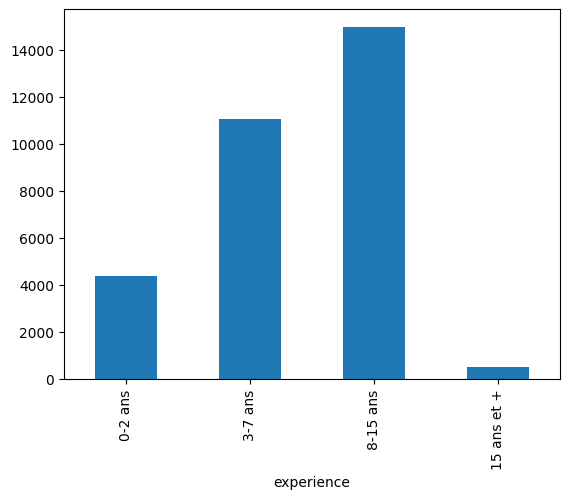

In [23]:
df['creation_date'] = pd.to_datetime(df['creation_date'], format='%Y-%m-%d')

# remove rows with no experience
df = df[df['experience'] != '-']

# Compter le nombre d'occurrences pour chaque année
occurrences = df['experience'].value_counts()

# sort data by year
occurrences = occurrences.sort_index()

# put a specific order
occurrences = occurrences.reindex(['0-2 ans', '3-7 ans', '8-15 ans', '15 ans et +'])

# bar plot
occurrences.plot(kind='bar')

# plot the data
plt.show()

Average and Median TJM for every experience level

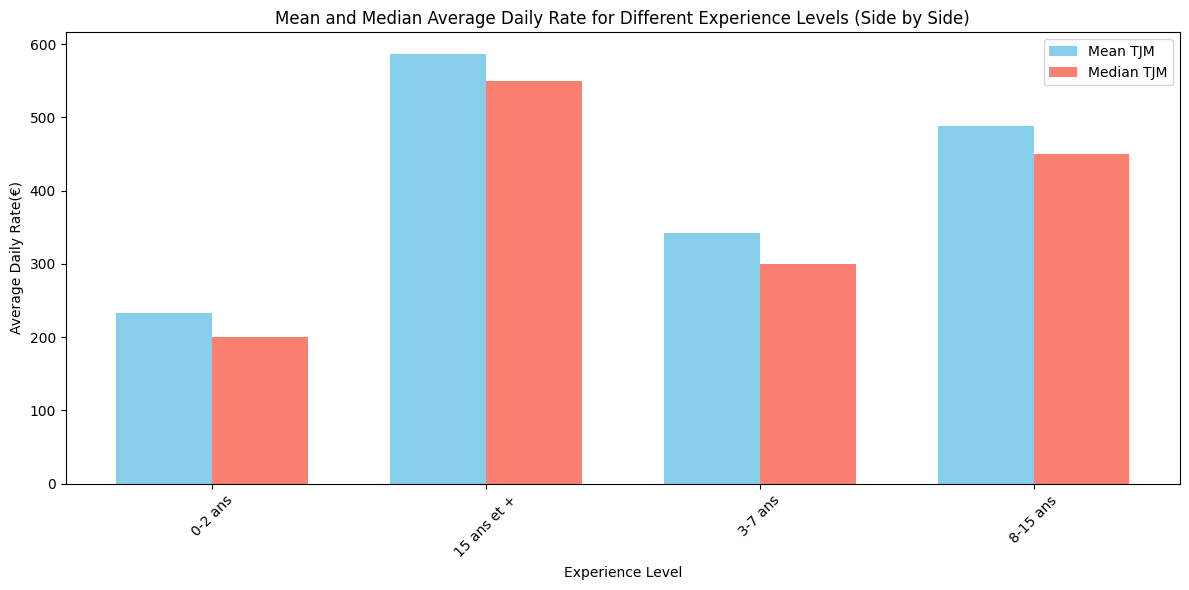

In [24]:

# Chargement du fichier CSV
df = '../../../datasets/parsed_malt_data.csv'
data = pd.read_csv(df)

# Prétraitement des données
# Remplacement de '-' par NaN dans la colonne 'experience' et suppression des lignes avec des valeurs NaN dans 'experience' et 'price'
data['experience'] = data['experience'].replace('-', pd.NA)
data.dropna(subset=['experience', 'price'], inplace=True)

# Groupement des données par 'experience' et calcul de la moyenne et de la médiane de 'price'
grouped_data = data.groupby('experience')['price'].agg(['mean', 'median']).reset_index()

# Calculation of bar positions for each experience level
bar_width = 0.35  
index = np.arange(len(grouped_data))  # Positions of Bar Groups

# Creating the Chart with the Bars Side by Side
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, grouped_data['mean'], bar_width, color='skyblue', label='Mean TJM')
plt.bar(index + bar_width/2, grouped_data['median'], bar_width, color='salmon', label='Median TJM')

plt.title('Mean and Median Average Daily Rate for Different Experience Levels (Side by Side)')
plt.xlabel('Experience Level')
plt.ylabel('Average Daily Rate(€)')
plt.xticks(index, grouped_data['experience'], rotation=45)
plt.legend()
plt.tight_layout()


plt.show()


Replot with mission cleaning: remove outliers that haven't done at least the equivalent of 1 mission per year on the platform

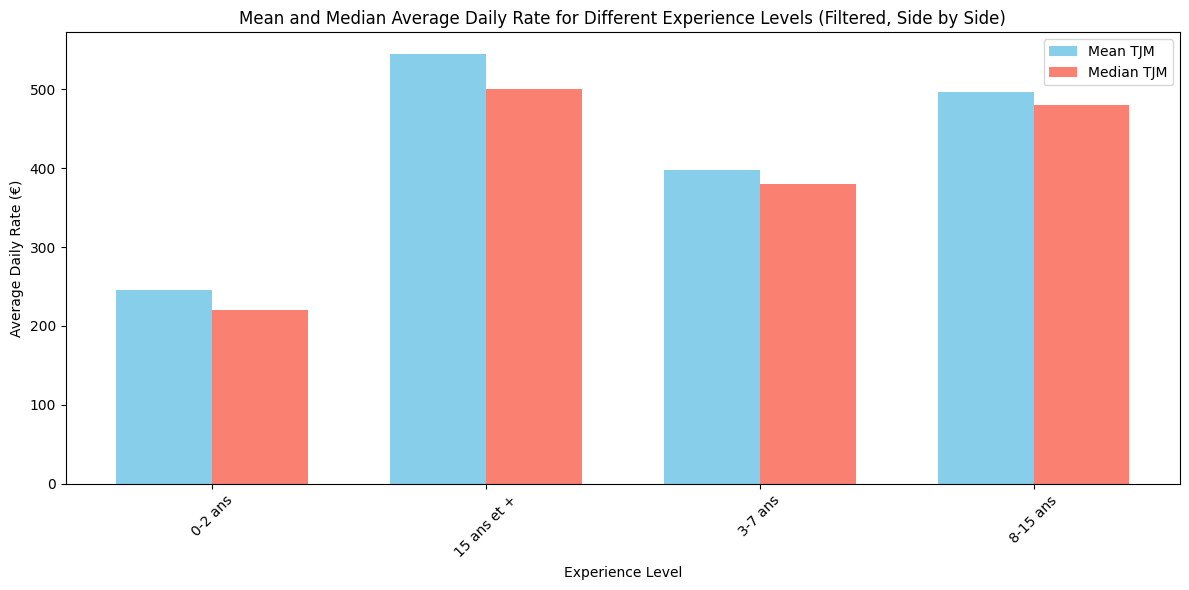

In [25]:
from datetime import datetime


df = '../../../datasets/parsed_malt_data.csv'
data = pd.read_csv(df)


data['experience'] = data['experience'].replace('-', pd.NA)
data.dropna(subset=['experience', 'price'], inplace=True)

# Converting the 'creation_date' column to datetime
data['creation_date'] = pd.to_datetime(data['creation_date'])

# Calculation of the duration of registration on the platform in years
current_date = datetime.now()
data['years_on_platform'] = (current_date - data['creation_date']).dt.days / 365.25

# Calculation of the number of assignments per year
data['missions_per_year'] = data['missions'] / data['years_on_platform']

# Screening of professionals who have carried out at least one assignment per year
filtered_data = data[data['missions_per_year'] >= 1]


grouped_filtered_data = filtered_data.groupby('experience')['price'].agg(['mean', 'median']).reset_index()


bar_width = 0.35  
index = np.arange(len(grouped_filtered_data))  


plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, grouped_filtered_data['mean'], bar_width, color='skyblue', label='Mean TJM')
plt.bar(index + bar_width/2, grouped_filtered_data['median'], bar_width, color='salmon', label='Median TJM')

plt.title('Mean and Median Average Daily Rate for Different Experience Levels (Filtered, Side by Side)')
plt.xlabel('Experience Level')
plt.ylabel('Average Daily Rate (€)')
plt.xticks(index, grouped_filtered_data['experience'], rotation=45)
plt.legend()
plt.tight_layout()


plt.show()


number of supermalter per experience level (are there more supermalter in the most experienced freelancers ?)